In [2]:
%matplotlib inline

In [48]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns


In [15]:
#colname=['mpg','cylinders','displacement','horsepower','weight','acceleration','model','origin','name']
Mpg_df=pd.read_csv("autoMPG.csv")

In [16]:

Mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
Mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,modelyear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
temp=pd.DataFrame(Mpg_df.horsepower.str.isdigit())
temp[temp['horsepower']==False]

,horsepower
32,False
126,False
330,False
336,False
354,False
374,False


In [20]:
Mpg_df=Mpg_df.replace('?',np.nan)

In [23]:
Mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
modelyear       398 non-null int64
origin          398 non-null int64
carname         398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [22]:
Mpg_df['horsepower']=Mpg_df['horsepower'].astype('float64')

In [24]:
num_cols=Mpg_df.drop('carname',axis=1)
carnames=pd.DataFrame(Mpg_df[['carname']])
num_cols=num_cols.apply(lambda x:x.fillna(x.median()),axis=0)
Mpg_df = num_cols.join(carnames)
Mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
modelyear       398 non-null int64
origin          398 non-null int64
carname         398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


/Users/rsklanu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/rsklanu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


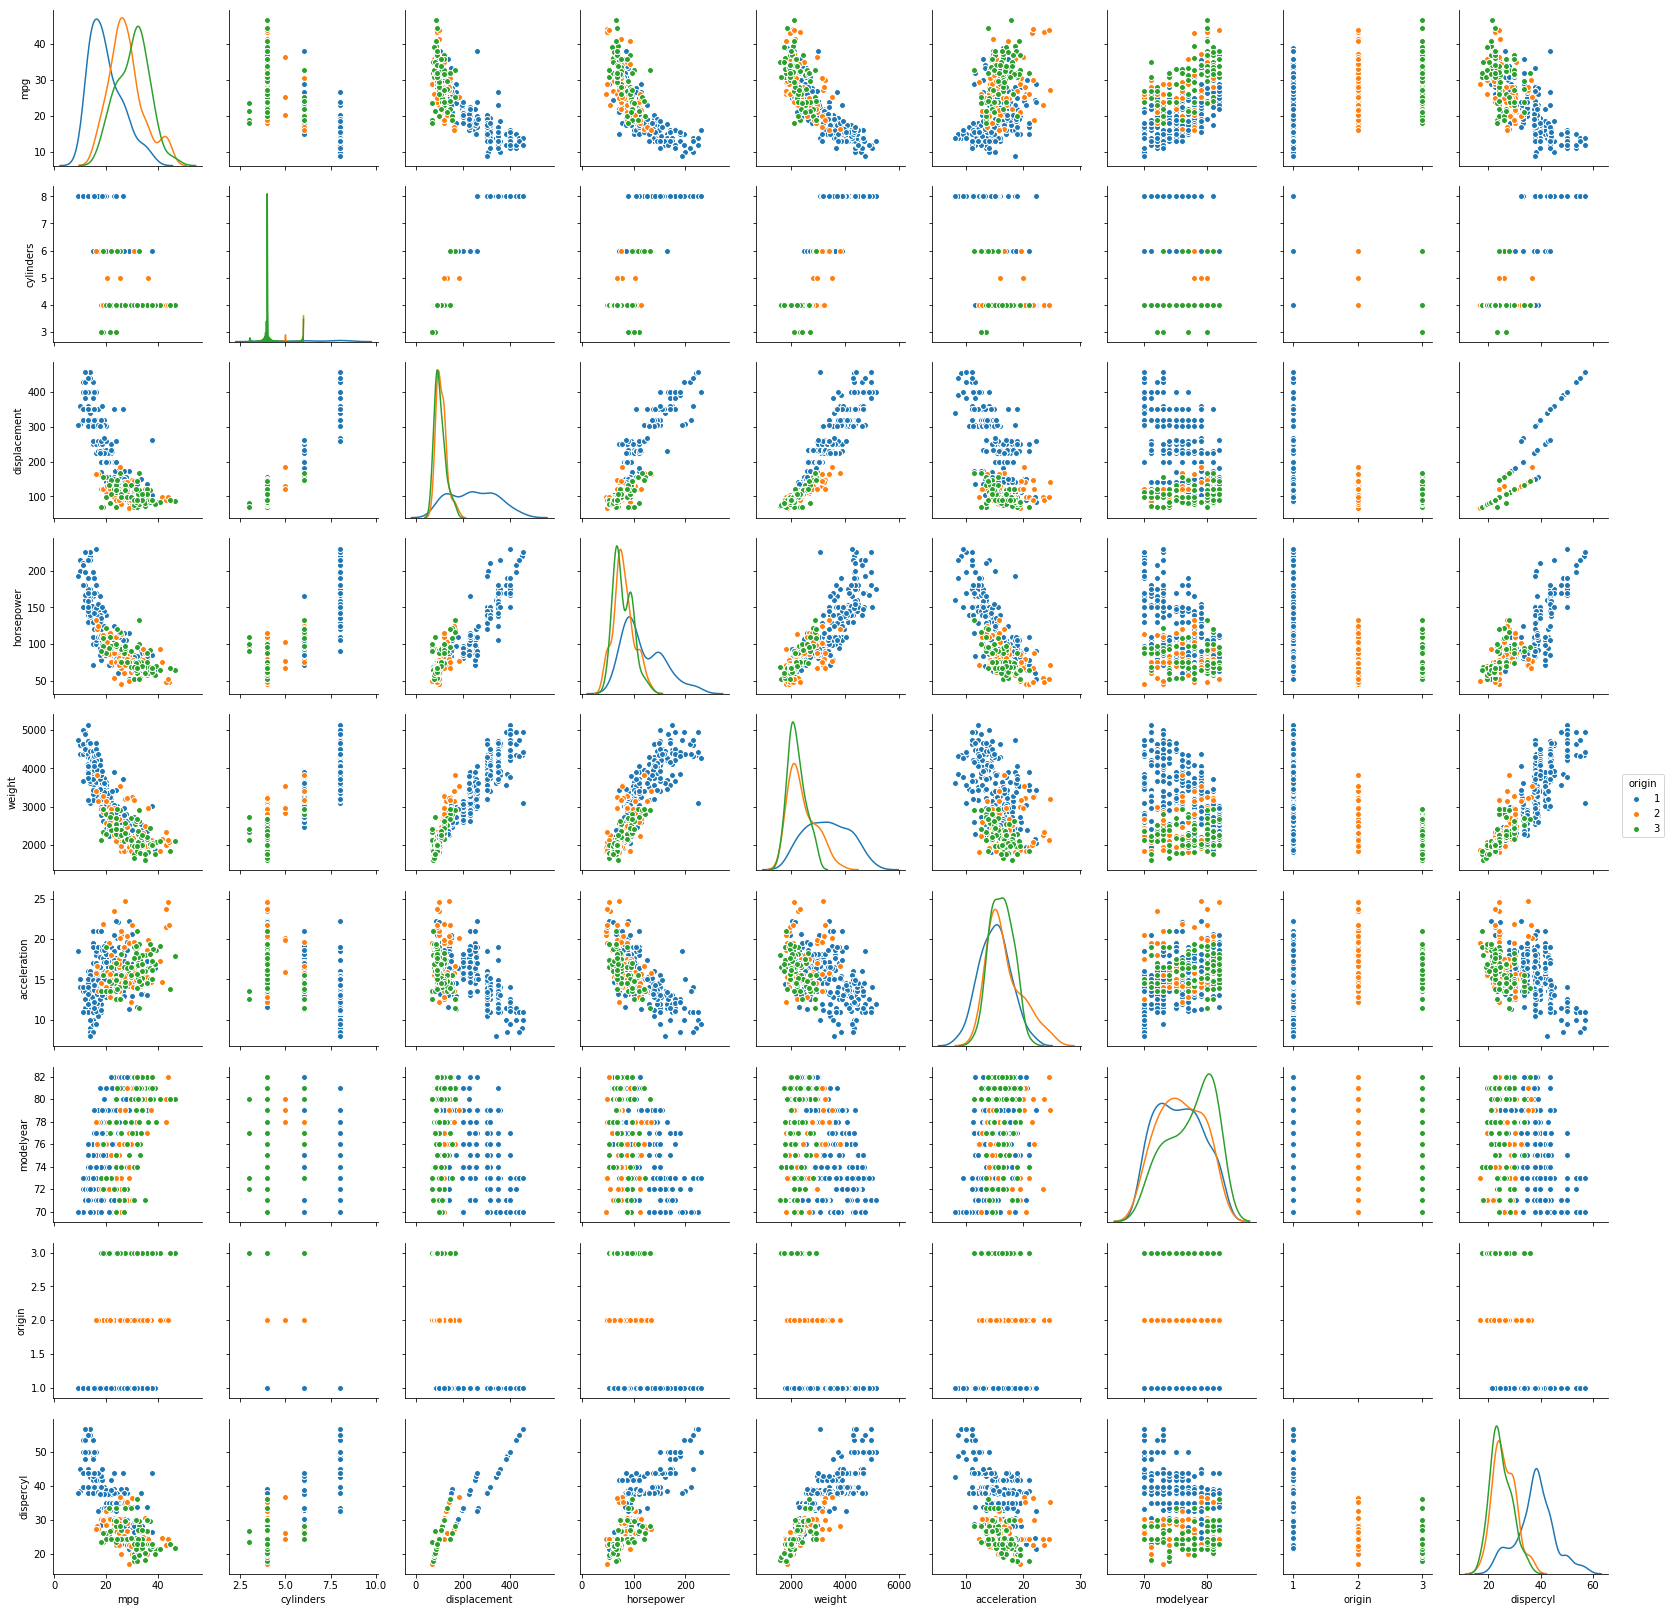

In [33]:
mpg_df_attr = Mpg_df.iloc[:, 0:8]
mpg_df_attr['dispercyl'] = mpg_df_attr['displacement'] / mpg_df_attr['cylinders']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'origin')

In [37]:
from scipy.stats import zscore
Mpg_df_attr=Mpg_df.loc[:,'mpg':'origin']
Mpg_df_Z=Mpg_df_attr.apply(zscore)
Mpg_df_Z.pop('origin')
Mpg_df_Z.pop('modelyear')

array=Mpg_df_Z.values
X = array[:,1:5] 
y = array[:,0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [38]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = mpg_df_attr.columns[1:9]
print(feature_names)

k = 8
top_k_idx = feature_importances.argsort()[-k:][::-1]
print(feature_names[top_k_idx], feature_importances)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'modelyear', 'origin', 'dispercyl'],
      dtype='object')
Index(['cylinders', 'horsepower', 'weight', 'displacement'], dtype='object') [0.74791504 0.01157464 0.19724952 0.04326079]


In [39]:
y_pred = regressor.predict(X_test)

/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


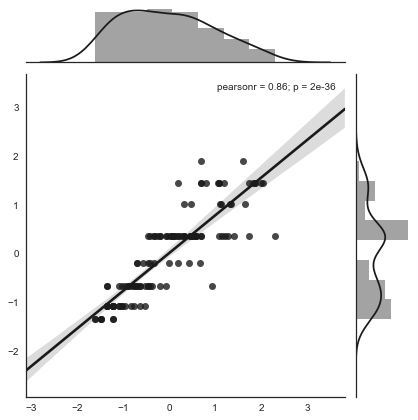

In [42]:
sns.set(style="darkgrid", color_codes=True)
        
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [45]:

Mpg_df_Z.pop('acceleration')
array = Mpg_df_Z.values
X = array[:,1:5] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


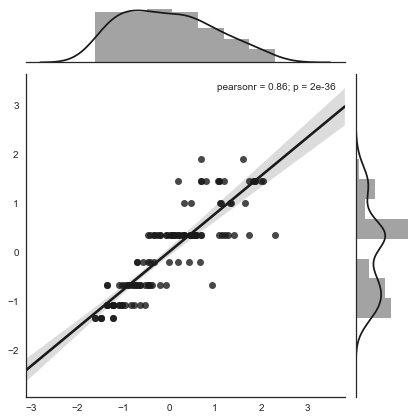

In [46]:
y_pred = regressor.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
        
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");


/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


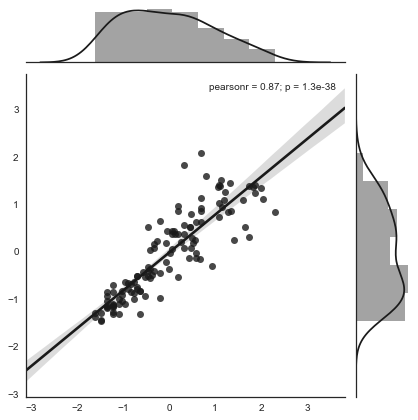

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 15)
rfr= rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rsklanu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


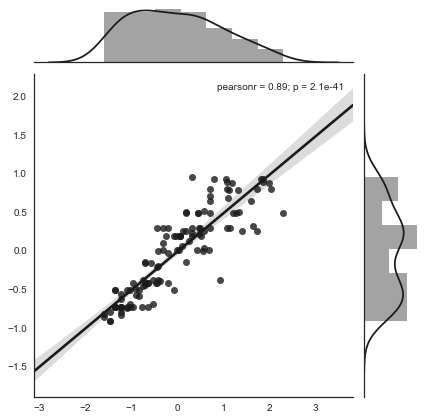

In [68]:
#Ensemble gradient boost
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=10)
gbr=gbr.fit(X_train, y_train)
y_pred=gbr.predict(X_test)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
